# LSTM과 GRU 셀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/9-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 11ms/step - loss: 0.6929 - accuracy: 0.5186 - val_loss: 0.6914 - val_accuracy: 0.5900
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6903 - accuracy: 0.6139 - val_loss: 0.6871 - val_accuracy: 0.6398
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6838 - accuracy: 0.6520 - val_loss: 0.6681 - val_accuracy: 0.5412
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6452 - accuracy: 0.5851 - val_loss: 0.6103 - val_accuracy: 0.7122
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5977 - accuracy: 0.7344 - val_loss: 0.5866 - val_accuracy: 0.7534
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5735 - accuracy: 0.7566 - val_loss: 0.5709 - val_accuracy: 0.7574
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5524 - accuracy: 0.7747 - val_loss: 0.5566 - val_accuracy: 0.76

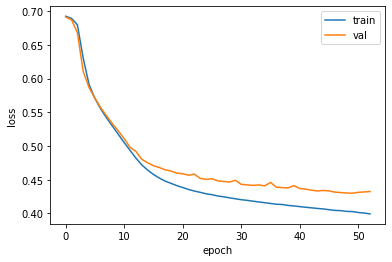

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환 층에 드롭아웃 적용하기

In [6]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6929 - accuracy: 0.5143 - val_loss: 0.6922 - val_accuracy: 0.5364
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6911 - accuracy: 0.5673 - val_loss: 0.6898 - val_accuracy: 0.5986
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6884 - accuracy: 0.6120 - val_loss: 0.6855 - val_accuracy: 0.6266
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6828 - accuracy: 0.6360 - val_loss: 0.6765 - val_accuracy: 0.6542
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6699 - accuracy: 0.6766 - val_loss: 0.6490 - val_accuracy: 0.6950
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6253 - accuracy: 0.7197 - val_loss: 0.5731 - val_accuracy: 0.7286
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5624 - accuracy: 0.7297 - val_loss: 0.5470 - val_accuracy: 0.746

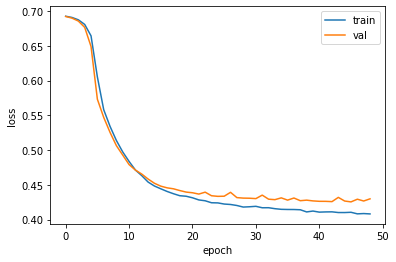

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [9]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 16ms/step - loss: 0.6926 - accuracy: 0.5309 - val_loss: 0.6906 - val_accuracy: 0.5468
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6875 - accuracy: 0.5804 - val_loss: 0.6710 - val_accuracy: 0.6272
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6526 - accuracy: 0.6605 - val_loss: 0.5972 - val_accuracy: 0.7146
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5872 - accuracy: 0.7209 - val_loss: 0.5535 - val_accuracy: 0.7464
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5478 - accuracy: 0.7439 - val_loss: 0.5244 - val_accuracy: 0.7626
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5217 - accuracy: 0.7591 - val_loss: 0.5046 - val_accuracy: 0.7668
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5028 - accuracy: 0.7703 - val_loss: 0.4893 - val_accuracy:

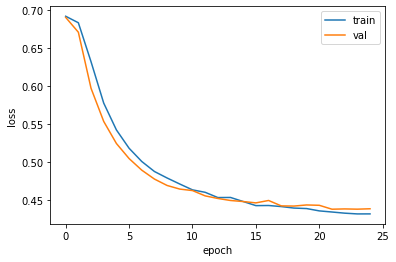

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

In [12]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 10ms/step - loss: 0.6924 - accuracy: 0.5098 - val_loss: 0.6902 - val_accuracy: 0.5562
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6892 - accuracy: 0.5702 - val_loss: 0.6862 - val_accuracy: 0.5824
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6840 - accuracy: 0.5929 - val_loss: 0.6797 - val_accuracy: 0.6008
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6760 - accuracy: 0.6173 - val_loss: 0.6689 - val_accuracy: 0.6188
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6623 - accuracy: 0.6401 - val_loss: 0.6515 - val_accuracy: 0.6432
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6406 - accuracy: 0.6639 - val_loss: 0.6213 - val_accuracy: 0.6690
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6021 - accuracy: 0.6911 - val_loss: 0.5676 - val_accuracy: 0.711

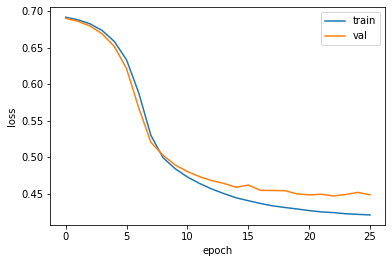

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 마무리

In [15]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 6ms/step - loss: 0.4335 - accuracy: 0.7988


[0.433514803647995, 0.7987599968910217]